Goal: plot the road network of Marikina, with the line widths varying according to the number of lanes.

Step 1: Extract road network of Marikina and convert to geodataframe

In [13]:
import osmnx

PLACE_NAME = "Marikina, Metro Manila"
graph = osmnx.graph_from_place(
    PLACE_NAME,
    # network_type="bike",
)
intersections, streets = osmnx.graph_to_gdfs(graph)

Step 2: Convert all NaN values in `lanes` column to 1

In [54]:
streets.loc[streets["lanes"].isna(), "lanes"] = 1
streets.dtypes

osmid         object
oneway          bool
lanes         object
highway       object
reversed      object
length       float64
geometry    geometry
ref           object
name          object
maxspeed      object
width         object
access        object
bridge        object
service       object
junction      object
tunnel        object
dtype: object

Step 3: Convert all list values in `lanes` column to the maximum value in that list
- recall: some OSM features can have multiples values for some tags
- for example, a given road may have 2 lanes as a residential road, and 1 lane as a pedestrian path
- after conversion, let's check whether there are any lists remaining in the `lanes` column

In [60]:
streets["lanes"] = streets["lanes"].apply(lambda x: max(x) if isinstance(x, list) == True else x)
streets["lanes"].apply(lambda v: isinstance(v, list)).any()

False

Step 4: Convert all values in `lanes` column to type `int`

In [73]:
streets["lanes"] = streets["lanes"].astype(int)
streets.lanes.unique()

array([2, 1, 4, 6, 5, 3])

Step 5: Assign line width per number of lanes (in this case, we simply scaled the number of lanes by 0.25, such that 1 lane: 0.25 inches and 6 lanes: 1.5 inches)

In [80]:
linewidths = {key: key*0.25 for key in range(1,7)}
print(linewidths)

{1: 0.25, 2: 0.5, 3: 0.75, 4: 1.0, 5: 1.25, 6: 1.5}


Step 6: Plot the result!
- group the geodataframe by the lane number
- plot each group separately, with line width set by the dictionary
- line color = white; face color = black; no x and y labels
- methodology based on this tutorial from [Earth Data Science](https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/)

([], [])

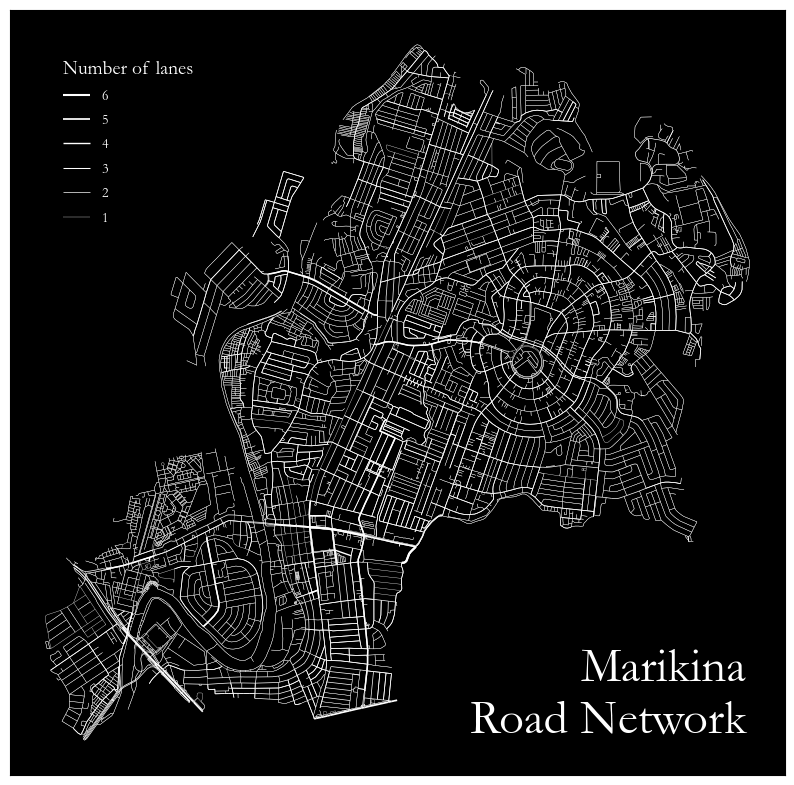

In [131]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for lane, data in streets.groupby("lanes"):
    
    data.plot(
        color="white",
        ax=ax,
        label=lane,
        linewidth=linewidths[lane]
    )

ax.set_facecolor("black")
ax.set_title(
    "Marikina City\nRoad Network",
    loc="right",
    color="white",

    fontsize=35.0,
    fontfamily="Garamond",
    fontstretch="expanded",

    y=0.05, # 5% of figure height (from bottom)
    x=0.95, # 95% of figure width (from left)
    pad=3.0
)

legend = ax.legend(
    title="Number of lanes",
    prop={"family":"Garamond"},
    title_fontproperties={
        "family":"Garamond",
        "size": 14.0
    },
    loc=(0.05, 0.70),
    facecolor="black",
    labelcolor="white",
    
    frameon=False,
    reverse=True,
    alignment="left",

    borderpad=1.0,
    labelspacing=0.75
)
plt.setp(legend.get_title(), color="white")

plt.xticks([])
plt.yticks([])